In [1]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import date, timedelta
from matplotlib.ticker import FuncFormatter

# Setting pandas dataframe display options
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)
pd.set_option("display.max_rows", 20)

# Set pandas style
plt.style.use('seaborn')

In [2]:
eur_usd = quandl.get("FRED/DEXUSEU")

In [3]:
eur_usd.head()

,Value
Date,
1999-01-04,1.1812
1999-01-05,1.1760
1999-01-06,1.1636
1999-01-07,1.1672
1999-01-08,1.1554


In [4]:
eur_usd.tail()

,Value
Date,
2017-09-18,1.1938
2017-09-19,1.1980
2017-09-20,1.1998
2017-09-21,1.1946
2017-09-22,1.1969


In [5]:
fundos = eur_usd.copy()

In [6]:
# new colnames
fundos.columns = ['EUR/USD']

In [7]:
fundos.head()

,EUR/USD
Date,
1999-01-04,1.1812
1999-01-05,1.1760
1999-01-06,1.1636
1999-01-07,1.1672
1999-01-08,1.1554


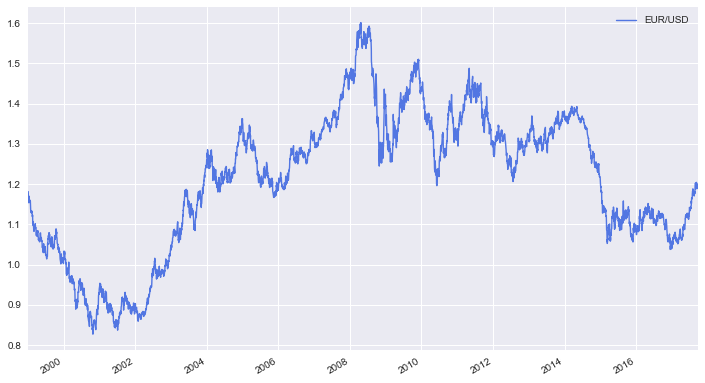

In [8]:
#### Plotting funds ####
fundos.plot(figsize = (12, 7),  alpha = 0.9, lw = 1.4, color=['royalblue', 'indigo', 'teal'])
plt.xlabel('')
plt.show()

In [9]:
fundos.loc['2001-01':].mean()

EUR/USD    1.234361
dtype: float64

In [10]:
fundos.median()

EUR/USD    1.2368
dtype: float64

In [11]:
#### Returns ####
returns = ((fundos / fundos.shift(1)) - 1) * 100

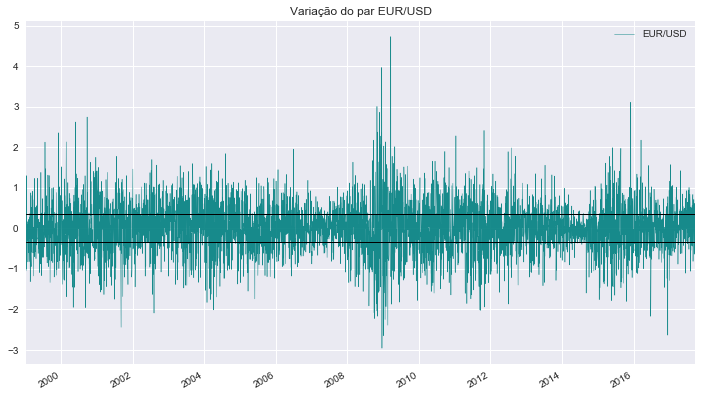

In [12]:
#### Plotting funds ####
returns.plot(figsize = (12, 7),  alpha = 0.9, lw = .5, color=['teal', 'indigo', 'royalblue'])
plt.xlabel('')


#plt.annotate('local max', xy=(returns[returns["2007-12-01"]], returns[returns["2009-06-01"]]), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.axvspan("2007-12-01", "2009-06-01", facecolor='dimgrey', alpha=0.25)

plt.axhline(y=0.35, linewidth=1, color='black')
plt.axhline(y=-0.35, linewidth=1, color='black')
plt.title('Variação do par EUR/USD')
plt.show()

In [13]:
returns_std = returns.std()

In [14]:
# Filters
over = returns > -0.35 # returns.std() * -1
under = returns < 0.35 # returns.std()

# Filtering DataFrame
returns[over & under].count()

EUR/USD    2354
dtype: int64

In [15]:
returns[over & under].count() / returns.count()

EUR/USD    0.500212
dtype: float64

In [16]:
returns.quantile(q=0.81)

EUR/USD    0.484249
Name: 0.81, dtype: float64

In [17]:
returns.std()

EUR/USD    0.628484
dtype: float64